In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,make_scorer
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [3]:
df= pd.read_csv("data.csv",index_col='id') # Loading the data.csv into te data frame.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31644 entries, 0 to 31643
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author               26620 non-null  object 
 1   geometry             26144 non-null  object 
 2   pressure [MPa]       27192 non-null  float64
 3   mass_flux [kg/m2-s]  26853 non-null  float64
 4   x_e_out [-]          21229 non-null  float64
 5   D_e [mm]             26156 non-null  float64
 6   D_h [mm]             27055 non-null  float64
 7   length [mm]          26885 non-null  float64
 8   chf_exp [MW/m2]      31644 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.4+ MB


In [5]:
df['author'].unique()

array(['Thompson', 'Beus', nan, 'Peskov', 'Janssen', 'Weatherhead',
       'Inasaka', 'Williams', 'Mortimore', 'Richenderfer', 'Kossolapov'],
      dtype=object)

In [6]:
df['chf_exp [MW/m2]'].unique().size

109

In [7]:
df['pressure [MPa]'].unique().size

145

In [8]:
df['x_e_out [-]'].unique().size

1683

In [9]:
df['geometry'].unique()

array(['tube', nan, 'annulus', 'plate'], dtype=object)

In [10]:
df.columns

Index(['author', 'geometry', 'pressure [MPa]', 'mass_flux [kg/m2-s]',
       'x_e_out [-]', 'D_e [mm]', 'D_h [mm]', 'length [mm]',
       'chf_exp [MW/m2]'],
      dtype='object')

In [11]:
columns=[]
for x in df.columns:
  x.replace(' ','')
  columns.append((x.replace('_','')).replace(' ',''))

In [12]:
df.columns=columns

In [13]:
df.head()

,author,geometry,pressure[MPa],massflux[kg/m2-s],xeout[-],De[mm],Dh[mm],length[mm],chfexp[MW/m2]
id,,,,,,,,,
0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8


<AxesSubplot: xlabel='pressure[MPa]', ylabel='xeout[-]'>

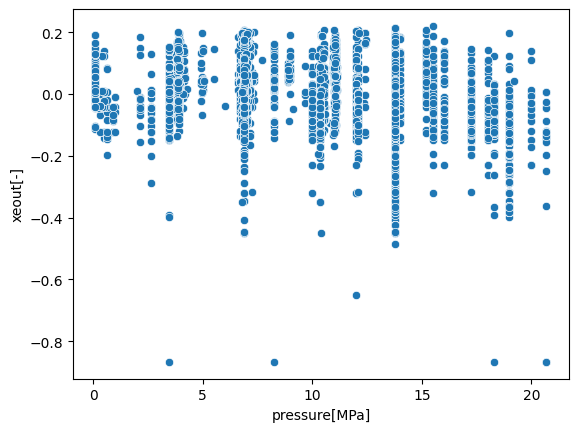

In [14]:
sns.scatterplot(df[df['geometry']=='tube'],y='xeout[-]',x='pressure[MPa]')

<AxesSubplot: xlabel='massflux[kg/m2-s]', ylabel='xeout[-]'>

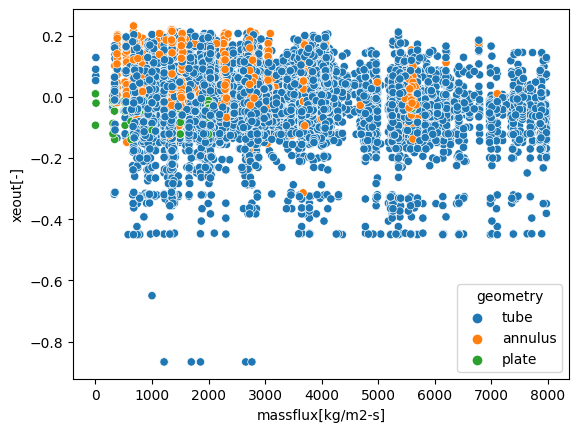

In [15]:
sns.scatterplot(df,y='xeout[-]',x='massflux[kg/m2-s]',hue='geometry')

<AxesSubplot: xlabel='De[mm]', ylabel='xeout[-]'>

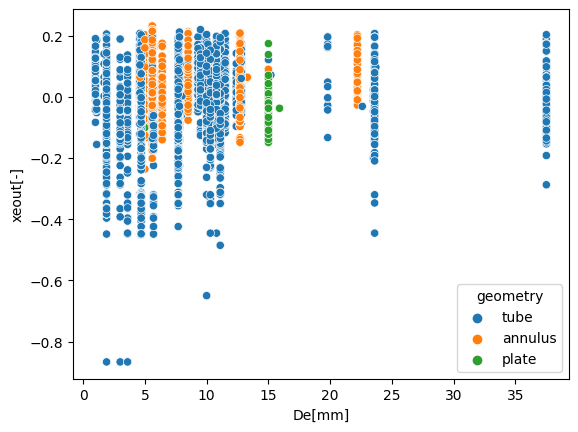

In [16]:
sns.scatterplot(df,y='xeout[-]',x='De[mm]',hue='geometry')

In [17]:
original_df=pd.read_csv('Data_CHF_Zhao_2020_ATE.csv',index_col='id') #Creating Original Data Frame as original_df by loading data.csv file

<AxesSubplot: xlabel='pressure [MPa]', ylabel='x_e_out [-]'>

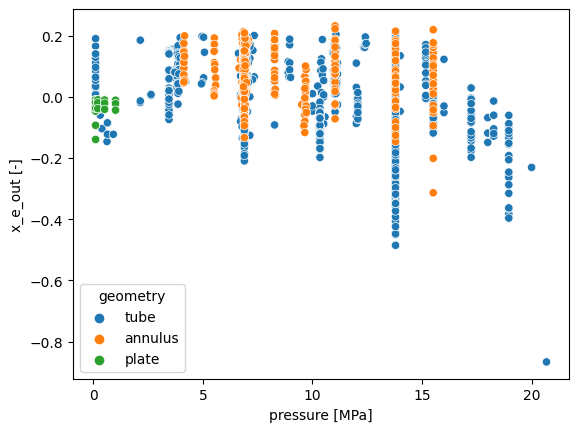

In [18]:
sns.scatterplot(original_df,x='pressure [MPa]',y='x_e_out [-]',hue='geometry')

In [19]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1865 entries, 1 to 1865
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author               1865 non-null   object 
 1   geometry             1865 non-null   object 
 2   pressure [MPa]       1865 non-null   float64
 3   mass_flux [kg/m2-s]  1865 non-null   int64  
 4   x_e_out [-]          1865 non-null   float64
 5   D_e [mm]             1865 non-null   float64
 6   D_h [mm]             1865 non-null   float64
 7   length [mm]          1865 non-null   int64  
 8   chf_exp [MW/m2]      1865 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 145.7+ KB


In [20]:
original_df['chf_exp [MW/m2]'].unique().size

109

In [21]:
original_df['x_e_out [-]'].unique().size

1360

In [22]:
df.head()

,author,geometry,pressure[MPa],massflux[kg/m2-s],xeout[-],De[mm],Dh[mm],length[mm],chfexp[MW/m2]
id,,,,,,,,,
0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8


In [23]:
df.drop('author',inplace=True,axis=1)

In [24]:
dummies=pd.get_dummies(df['geometry'])


In [25]:
df=pd.concat([df,dummies],axis=1)

In [26]:
df.head()

,geometry,pressure[MPa],massflux[kg/m2-s],xeout[-],De[mm],Dh[mm],length[mm],chfexp[MW/m2],annulus,plate,tube
id,,,,,,,,,,,
0,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6,0,0,1
1,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2,0,0,1
2,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5,0,0,0
3,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0,1,0,0
4,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8,0,0,1


In [27]:
df.drop('geometry',inplace=True,axis=1)

In [28]:
df.shape

(31644, 10)

In [29]:
df.columns

Index(['pressure[MPa]', 'massflux[kg/m2-s]', 'xeout[-]', 'De[mm]', 'Dh[mm]',
       'length[mm]', 'chfexp[MW/m2]', 'annulus', 'plate', 'tube'],
      dtype='object')

In [30]:
from sklearn.impute import KNNImputer
impute_cols =df.drop('xeout[-]',axis=1).columns
# Create a KNN imputer object
imputer = KNNImputer(n_neighbors=5)
   
# Perform imputation for the subset using the KNN imputer
imputed_values = imputer.fit_transform(df[impute_cols])
# Update the original DataFrame with the imputed values
df[impute_cols] = imputed_values
# Print the filled DataFrame
df.head(10)

,pressure[MPa],massflux[kg/m2-s],xeout[-],De[mm],Dh[mm],length[mm],chfexp[MW/m2],annulus,plate,tube
id,,,,,,,,,,
0,7.00,3770.0,0.1754,10.8,10.8,432.0,3.6,0.0,0.0,1.0
1,8.96,6049.0,-0.0416,10.3,10.3,762.0,6.2,0.0,0.0,1.0
2,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5,0.0,0.0,0.0
3,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0,1.0,0.0,0.0
4,13.79,686.0,NaN,11.1,11.1,457.0,2.8,0.0,0.0,1.0
5,17.24,3648.0,-0.0711,1.9,1.9,696.0,3.6,0.0,0.0,0.0
6,6.89,549.0,0.1203,12.8,12.8,1930.0,2.6,0.0,0.0,0.0
7,18.00,750.0,NaN,10.0,10.0,1650.0,2.2,0.0,0.0,1.0
8,12.07,4042.0,-0.0536,5.2,5.2,152.0,5.6,0.0,0.0,1.0


In [31]:
new_column_names = ['pressure', 'mass_flux', 'exit_concentration', 'equivalent_diameter', 'hydraulic_diameter', 'channel_length', 'exp_critical_heat_flux','annulus','plate','tube']

df1=df.copy()
df1.columns=new_column_names

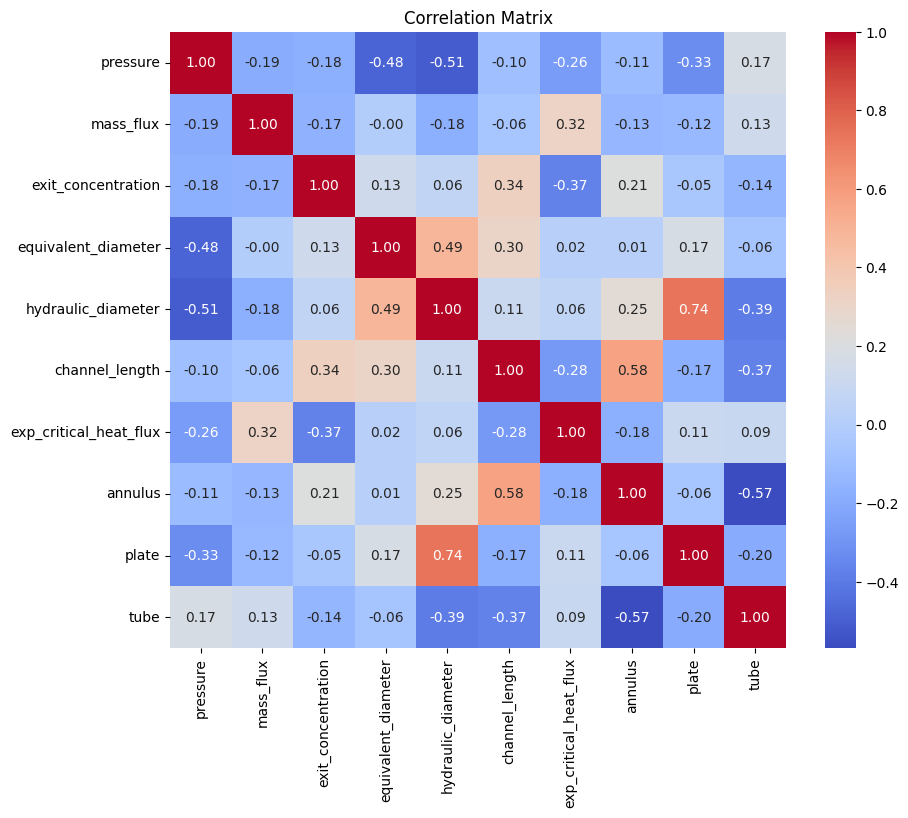

In [32]:
# Visualize the corelation matrix
correlation_matrix = df1.corr()

# Create a heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Set plot title
plt.title("Correlation Matrix")

# Display the plot
plt.show()

In [33]:
original_df.drop('author',inplace=True,axis=1)

In [34]:
dummies_org=pd.get_dummies(original_df['geometry'])
original_df1=pd.concat([original_df,dummies_org],axis=1)
original_df1.head()

,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2],annulus,plate,tube
id,,,,,,,,,,,
1,tube,0.39,5600,-0.1041,3.0,3.0,100,11.3,0,0,1
2,tube,0.31,6700,-0.0596,3.0,3.0,100,10.6,0,0,1
3,tube,0.33,4300,-0.0395,3.0,3.0,100,7.3,0,0,1
4,tube,0.62,6400,-0.1460,3.0,3.0,100,12.8,0,0,1
5,tube,0.64,4700,-0.0849,3.0,3.0,100,11.0,0,0,1


In [35]:
original_df1.drop('geometry',inplace=True,axis=1)

In [36]:
new_column_names = ['pressure', 'mass_flux', 'exit_concentration', 'equivalent_diameter', 'hydraulic_diameter', 'channel_length', 'exp_critical_heat_flux','annulus','plate','tube']
original_df1.columns=new_column_names

In [37]:
main_df=df1[df1['exit_concentration'].notnull()]

In [38]:
T_df=pd.concat([main_df,original_df1],axis=0)
T_df.shape

(23094, 10)

In [39]:
X=T_df.drop('exit_concentration',axis=1)
Y=T_df['exit_concentration']
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,random_state=30)

In [40]:
'''### I have dropped the author feature because 
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
# Create and train the XGBoost Regressor
XGB_regressor = xgb.XGBRegressor(n_estimators=150,learning_rate=0.5,max_depth=5,subsample=1,colsample_bytree=0.99,alpha=0.95,random_state=30)
XGB_regressor.fit(X_train,Y_train)

# Make predictions on the test set
y_pred = XGB_regressor.predict(X_test)

# Calculate the mean squared error and r2 score
mse = mean_squared_error(Y_test,y_pred)
r2 = r2_score(Y_test,y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)
print("RMSE:",np.sqrt(mse))'''

'### I have dropped the author feature because \nimport pandas as pd\nimport xgboost as xgb\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import mean_squared_error, r2_score\nfrom xgboost import XGBRegressor\n# Create and train the XGBoost Regressor\nXGB_regressor = xgb.XGBRegressor(n_estimators=150,learning_rate=0.5,max_depth=5,subsample=1,colsample_bytree=0.99,alpha=0.95,random_state=30)\nXGB_regressor.fit(X_train,Y_train)\n\n# Make predictions on the test set\ny_pred = XGB_regressor.predict(X_test)\n\n# Calculate the mean squared error and r2 score\nmse = mean_squared_error(Y_test,y_pred)\nr2 = r2_score(Y_test,y_pred)\n\nprint("Mean Squared Error:", mse)\nprint("R2 Score:", r2)\nprint("RMSE:",np.sqrt(mse))'

In [41]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'iterations':[200,250,300],'learning_rate': [0.1,0.05,0.01],'depth':[3,5,7]
              ,'l2_leaf_reg':[1,3,5],'bagging_temperature':[0.5, 1, 1.5],'random_strength':[0.1,0.5,1],'border_count':[32,64,128]}
# Create the XGBoost regressor estimate
catboost=CatBoostRegressor()

# Performing grid search
grid_search = GridSearchCV(catboost,param_grid=param_grid,scoring='neg_root_mean_squared_error',cv=10,n_jobs=-1)
grid_search.fit(X_train,Y_train)

# Getting the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluation of the built best model
mse = mean_squared_error(Y_test,best_model.predict(X_test))
r2 = r2_score(Y_test,best_model.predict(X_test))

print("Best Parameters:", best_params)
print("Mean Squared Error:", mse)
print('RMSE:',np.sqrt(mse))
print("R2 Score:", r2)

In [1]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10],
    'epsilon': [0.1, 0.01, 0.001]
}

svr_model = SVR()

# Performing grid search
grid_search = GridSearchCV(svr_model,param_grid=param_grid,scoring='neg_root_mean_squared_error',cv=5,n_jobs=-1)
grid_search.fit(X_train,Y_train)

# Getting the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluation of the built best model
mse = mean_squared_error(Y_test,best_model.predict(X_test))
r2 = r2_score(Y_test,best_model.predict(X_test))

print("Best Parameters:", best_params)
print("Mean Squared Error:", mse)
print('RMSE:',np.sqrt(mse))
print("R2 Score:", r2)

NameError: name 'X_train' is not defined

In [49]:
pip install lightgbm

  Using cached lightgbm-3.3.5-py3-none-win_amd64.whl (1.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5]
    #'min_child_samples': [10, 20, 30]
}
# Create the XGBoost regressor estimate
lgbm_reg=LGBMRegressor()

# Performing grid search
grid_search = GridSearchCV(lgbm_reg,param_grid=param_grid,scoring='neg_root_mean_squared_error',cv=5,n_jobs=-1)
grid_search.fit(X_train,Y_train)

# Getting the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluation of the built best model
mse = mean_squared_error(Y_test,best_model.predict(X_test))
r2 = r2_score(Y_test,best_model.predict(X_test))

print("Best Parameters:", best_params)
print("Mean Squared Error:", mse)
print('RMSE:',np.sqrt(mse))
print("R2 Score:", r2)

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],  # Number of trees in the forest
    'max_depth': [3, 5, 10, None],    # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'], # Number of features to consider when looking for the best split
    'bootstrap': [True, False]
}
rf_reg=RandomForestRegressor()
# Performing grid search
grid_search=GridSearchCV(rf_reg,param_grid=param_grid,scoring='neg_root_mean_squared_error',cv=5,n_jobs=-1)
grid_search.fit(X_train,Y_train)

# Getting the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluation of the built best model
mse = mean_squared_error(Y_test,best_model.predict(X_test))
r2 = r2_score(Y_test,best_model.predict(X_test))

print("Best Parameters:", best_params)
print("Mean Squared Error:", mse)
print('RMSE:',np.sqrt(mse))
print("R2 Score:", r2)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error: 0.004929151674866145
RMSE: 0.07020791746566868
R2 Score: 0.5072618226755312


In [40]:
df.columns

Index(['pressure[MPa]', 'massflux[kg/m2-s]', 'xeout[-]', 'De[mm]', 'Dh[mm]',
       'length[mm]', 'chfexp[MW/m2]', 'annulus', 'plate', 'tube'],
      dtype='object')

In [41]:
Valid=df[df['xeout[-]'].isnull()]
Valid

,pressure[MPa],massflux[kg/m2-s],xeout[-],De[mm],Dh[mm],length[mm],chfexp[MW/m2],annulus,plate,tube
id,,,,,,,,,,
4,13.790,686.0,NaN,11.10,11.1,457.0,2.8,0.0,0.0,1.0
7,18.000,750.0,NaN,10.00,10.0,1650.0,2.2,0.0,0.0,1.0
10,12.406,3025.4,NaN,1.90,1.9,152.0,3.2,0.0,0.0,1.0
12,6.890,7500.0,NaN,12.40,12.8,1930.0,4.8,0.0,0.0,0.0
23,15.510,1355.0,NaN,5.60,15.2,2134.0,2.1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
31633,11.030,3396.2,NaN,11.50,11.5,1219.2,2.0,0.0,0.0,1.0
31634,1.010,2000.0,NaN,15.00,120.0,10.0,6.2,0.0,1.0,0.0
31637,13.790,688.0,NaN,10.42,11.1,457.0,2.3,0.0,0.0,1.0


In [42]:
new_column_names = ['pressure', 'mass_flux', 'exit_concentration', 'equivalent_diameter', 'hydraulic_diameter', 'channel_length', 'exp_critical_heat_flux','annulus','plate','tube']
Valid.columns=new_column_names

In [43]:
X=Valid.drop('exit_concentration',axis=1)
Y_predict=best_model.predict(X)

In [45]:
sb_file=pd.read_csv('sample_submission (2).csv',index_col='id')
sb_file.head()

,x_e_out [-]
id,
4,0.0
7,0.0
10,0.0
12,0.0
23,0.0


In [46]:
sb_file['x_e_out [-]']=Y_predict
sb_file.head()

,x_e_out [-]
id,
4,0.008606
7,-0.105865
10,-0.042858
12,-0.001869
23,0.053037


In [47]:
sb_file.to_csv('sb_cat.csv')